
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Homework - 03  (Total points - 15)</font></center></h1>
<h2><center> <font color='black'> Introduction to Network Analysis</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>


================================================================================================================

# Homework instructions


- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.


- The accepted submission format is .ipynb file. Please upload the file on moodle.

- The submission will automatically close on **<font color='red'>25 April 2023 at 23:59 pm</font>**, so please make sure you have enough time to submit the homework. 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 

- Please Click on "**Restart and Run All**" before uploading the '.ipynb' file.

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- **Note: The tasks which involves writing your thoughts should not contain more than 3-4 sentences. It should be clear and concise.**


**<h2><font color='red'>Student info:</font></h2>**


<font color='red'>Full name: </font>  Samir Musali

<font color='red'>Student ID: </font> C29810

================================================================================================================

# 1. Node Classification using Graph Convolutional Network (10 points)
Documentation for reference - https://stellargraph.readthedocs.io/en/stable/demos/link-prediction/gcn-link-prediction.html 

# Preprocessing

In [3]:
# cloning the repository
! git clone https://github.com/stellargraph/stellargraph.git

 # just for validation that the repository has been cloned
%cd stellargraph 
! dir

! pip install -r requirements.txt #this command will install all the required dependencies. This will take a while to run and if you encounter "subprocess-exited-with-error" do not worry, just go ahead.

# stellargraph was built in 3.6 so we are downgrading the python version to 3.6
# first install python 3.6
!sudo apt-get update -y
!sudo apt-get install python3.6
# change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.6 1
# select python version
!sudo update-alternatives --config python3
# check python version
!python --version
# install pip for new python 
!sudo apt-get install python3.6-distutils
!wget https://bootstrap.pypa.io/get-pip.py
!python get-pip.py
# upgrade pip
!sudo apt install python3-pip
!python -m pip install --upgrade pip

! dir # see the directories and files present,  directory named stellargraph should be here.

! pip install stellargraph # installing the stellargraph library



fatal: destination path 'stellargraph' already exists and is not an empty directory.
/content/stellargraph/stellargraph
calibration.py	datasets      interpretability	__pycache__
connector	ensemble.py   layer		random.py
core		globalvar.py  losses.py		utils
data		__init__.py   mapper		version.py
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubunt

# Libraries

In [4]:
# Importing required libraries (install other libraries if needed)
import os

import pandas as pd

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN
from stellargraph import StellarGraph
from stellargraph.datasets import Cora

from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline

## 1.1 Processing on the dataset (1 point)

Reference: https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html

**1.1.1 Download the Cora dataset into your local machine and do some pre-processing.  (0.5 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

We’ve been using a synthetic graph with perfectly formatted data as an example till now, because it helps us focus on just the core StellarGraph functionality. Real life isn’t so simple; there’s usually files to wrangle and formats to convert, so we’ll use real data in this notebook to go from data in files to a StellarGraph.

We’ll work with the Cora dataset from https://linqs.soe.ucsc.edu/data:

The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words. The README file in the dataset provides more details.

The dataset contains two files: cora.cites and cora.content.

cora.cites is a tab-separated values (TSV) file of the graph edges. The first column identifies the cited paper, and the second column identifies the paper that cites it. The first three lines of the file look like:

35  1033<br>
35  103482<br>
35  103515<br>
...
cora.content is also a TSV file of information about each node (paper), with 1435 columns: the first column is the node ID (matching the IDs used in cora.cites), the next 1433 are the 0/1-values of word vectors, and the last is the subject area class of the paper. The first three lines of the file look like (with the 1423 of the 0/1 columns truncated)

31336   0   0   ... 0   1   0   0   0   0   0   0   Neural_Networks<br>
1061127 0   0   ... 1   0   0   0   0   0   0   0   Rule_Learning<br>
1106406 0   0   ... 0   0   0   0   0   0   0   0   Reinforcement_Learning<br>
...
This graph is homogeneous (all nodes are papers, and all edges are citations), with node features (the 0/1-values) but no edge weights.

The StellarGraph library provides the datasets module for working with some common datasets via classes like Cora (docs). It can download the necessary files via the download method. (The load method also converts it into a StellarGraph, but that’s too helpful for this tutorial: we’re learning how to do that ourselves.)

In [5]:
# Cora dataset download
cora = Cora()
cora.download()

# the base_directory property tells us where it was downloaded to:
cora_cites_file = os.path.join(cora.base_directory, "cora.cites")
cora_content_file = os.path.join(cora.base_directory, "cora.content")

We’ve now got the files on disk, so we can read them using the pd.read_csv function. Despite the “CSV” in the name, this function can be used to read TSV files too. The files don’t have a row of column headings, so we’ll want to set our own.

First, the edges. We can use source and target as the column headings, to match StellarGraph’s defaults. However, the natural phrasing is “paper X cites paper Y”, not “paper Y is cited by paper X”, so we use the columns in reverse order to match.

In [6]:
cora_cites = pd.read_csv(
    cora_cites_file,
    sep="\t",  # tab-separated
    header=None,  # no heading row
    names=["target", "source"],  # set our own names for the columns
)
cora_cites

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


Now, the nodes. Again, we have to choose the columns’ names. The names of the 0/1-columns don’t matter so much, but we can give the first column (of IDs) and the last one (of subjects) useful names.

In [7]:
cora_feature_names = [f"w{i}" for i in range(1433)]

cora_raw_content = pd.read_csv(
    cora_content_file,
    sep="\t",  # tab-separated
    header=None,  # no heading row
    names=["id", *cora_feature_names, "subject"],  # set our own names for the columns
)
cora_raw_content

,id,w0,w1,w2,w3,w4,w5,w6,w7,w8,...,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


As we saw above when adding node features, StellarGraph uses the index of the DataFrame as the connection between a node and a row of the DataFrame. Currently our dataframe just has a simple numeric range as the index, but it needs to be using the id column. Pandas offers a few ways to control the indexing; in this case, we want to replace the current index by moving the id column to it, which is done most easily with set_index:

In [8]:
cora_content_str_subject = cora_raw_content.set_index("id")
cora_content_str_subject

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,subject
id,,,,,,,,,,,,,,,,,,,,,
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms


We’re almost ready to create the StellarGraph, we just have to do something about the non-numeric subject column. Many machine learning models only work on numeric features, requiring text and other data to be converted before apply; the models in StellarGraph are no different.

There are two options, depending on the task:

1. remove the subject column entirely: many uses of Cora are predicting the subject of a node, given all of the graph structure and other information, so including it as information in the graph is giving the answer directly

2. convert it to numeric via one-hot encoding, where we have 7 columns of 0 and 1, one for each subject value (similar to the 1433 other w... features). <br>
**We will be using option - 1 in this notebook,**

**Removing columns**<br>
Let’s start with the first, removing the columns. The drop method lets us remove one or more columns.

In [9]:
cora_content_no_subject = cora_content_str_subject.drop(columns="subject")
cora_content_no_subject

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1423,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432
id,,,,,,,,,,,,,,,,,,,,,
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1061127,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We’ve got all the right node data, and the right edges, so now we can create a StellarGraph using the techniques we saw in the “homogeneous graph with features” section above.

In [10]:
cora_no_subject = StellarGraph({"paper": cora_content_no_subject}, {"cites": cora_cites})
print(cora_no_subject.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


If we’re trying to predict the subject, we’ll probably need to use the subject labels as ground-truth labels in a supervised or semi-supervised machine learning task. This can be extracted from the DataFrame and held separately, to be passed in as training, validation or test examples.

In [11]:
cora_subject = cora_content_str_subject["subject"]
cora_subject

id
31336             Neural_Networks
1061127             Rule_Learning
1106406    Reinforcement_Learning
13195      Reinforcement_Learning
37879       Probabilistic_Methods
                    ...          
1128975        Genetic_Algorithms
1128977        Genetic_Algorithms
1128978        Genetic_Algorithms
117328                 Case_Based
24043             Neural_Networks
Name: subject, Length: 2708, dtype: object

**1.1.2 Splitting the data.  (0.5 point)**<br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


For machine learning we want to take a subset of the nodes for training, and use the rest for validation and testing. Use scikit-learn’s train_test_split function to do this.

Here we’re taking 200 node labels for training, 600 for validation, and the rest for testing.

In [12]:
train_subjects, test_and_val_subjects = model_selection.train_test_split(
    cora_content_str_subject.index, train_size=200, test_size=None, stratify=cora_subject
)
val_subjects, test_subjects = model_selection.train_test_split(
    test_and_val_subjects, train_size=600, test_size=None, stratify=cora_subject.loc[test_and_val_subjects]
)

Note using stratified sampling gives the following counts:

In [13]:
train_subjects.value_counts().to_frame()

,id
37884,1
63549,1
1128997,1
1103737,1
642894,1
...,...
1129442,1
308003,1
1131421,1
140569,1


The training set has class imbalance that might need to be compensated, e.g., via using a weighted cross-entropy loss in model training, with class weights inversely proportional to class support. However, we will ignore the class imbalance in this example, for simplicity.

### Converting to numeric arrays
For our categorical target, we will use one-hot vectors that will be compared against the model’s soft-max output. To do this conversion we can use the LabelBinarizer transform from scikit-learn. Another option would be the pandas.get_dummies function, but the scikit-learn transform allows us to do the inverse transform easily later in the notebook, to interpret the predictions.

In [14]:
target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(train_subjects)
val_targets = target_encoding.transform(val_subjects)
test_targets = target_encoding.transform(test_subjects)

## 1.2  GCN  (9 points)

Create a generator instance by using grah object.

In [32]:
generator = FullBatchNodeGenerator(cora_no_subject, method="gcn", sparse=False)

Using GCN (local pooling) filters...


In [33]:
train_gen = generator.flow(train_subjects, train_targets)

**1.2.1 Define two GCN models here. In first, use 32 as hidden units in both the layers, keep activation function as relu, dropout layer as 40%. In second, use 32 as hidden units in both the layers, keep activation function as relu, dropout layer as 60%. (1 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


In [34]:
gcn1 = GCN(
    layer_sizes=[32, 32],
    activations=["relu", "relu"],
    generator=generator,
    dropout=0.4
)

In [35]:
gcn2 = GCN(
    layer_sizes=[32, 32],
    activations=["relu", "relu"],
    generator=generator,
    dropout=0.6
)

**1.2.2 What you think what should happen by changing the parameters of GCN model here? Should performance of the test set increases or decreases? State your reasons. (1 point)** <br>
<font color='red'>Write your observation in the `Your answer` cell.</font>

**<font color='red'>Your answer:</font>** By changing the parameters of the GCN model, the test set's performance can either increase or decrease, depending on the specific changes made to the model.

For example, increasing the number of hidden units in the GCN layers can increase the model's capacity to learn more complex relationships between the nodes. It can lead to better performance on the test set. Similarly, decreasing the dropout rate can reduce the regularization applied to the model, leading to better performance on the test set.

On the other hand, decreasing the number of hidden units or increasing the dropout rate can reduce the model's capacity to learn complex relationships between the nodes, leading to worse performance on the test set.

It is important to note that finding the optimal parameters for a machine learning model often involves a process of trial and error, and it is typically necessary to experiment with different configurations to find the best-performing model.

To create a Keras model we now expose the input and output tensors of the GCN model for node prediction, via the GCN.in_out_tensors method: <br>
**Note: Use the first GCN model we created by the name of 'gcn1' instance for all the steps below.**

In [37]:
x_inp, x_out = gcn1.in_out_tensors()

x_out

<KerasTensor: shape=(1, None, 32) dtype=float32 (created by layer 'gather_indices_1')>

**1.2.3 Define the last layer, that is, softmax layer (1 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>


In [38]:
from tensorflow.keras import layers

predictions = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

**1.2.4 Compile the model. Keep the parameters same as was discussed in the lab (1 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [39]:
from tensorflow.keras import optimizers, losses

model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

In [40]:
val_gen = generator.flow(val_subjects, val_targets)

In [41]:
es_callback = EarlyStopping(monitor="val_acc", patience=50, restore_best_weights=True)

**1.2.5 Train the model. Keep the parameters same as was discussed in the lab (1 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [42]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=200,
    verbose=2,
    shuffle=False,  # this should be False, since shuffling data means shuffling the whole graph
    callbacks=[es_callback],
)

Epoch 1/200
1/1 - 6s - loss: 5.2974 - acc: 0.0100 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 6s/epoch - 6s/step
Epoch 2/200
1/1 - 2s - loss: 5.2758 - acc: 0.0200 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 3/200
1/1 - 2s - loss: 5.2456 - acc: 0.0300 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 4/200
1/1 - 2s - loss: 5.2058 - acc: 0.0400 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 5/200
1/1 - 2s - loss: 5.1515 - acc: 0.0650 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 6/200
1/1 - 1s - loss: 5.0761 - acc: 0.0550 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 7/200
1/1 - 1s - loss: 4.9824 - acc: 0.0800 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 891ms/epoch - 891ms/step
Epoch 8/200
1/1 - 1s - loss: 4.8705 - acc: 0.1000 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 914ms/epoch - 914ms/step
Epoch 9/200
1/1 - 1s - loss: 4.7600 - acc: 0.1050 - val_loss

**1.2.6 Plot the accuracy and loss of the train and validation set (1 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

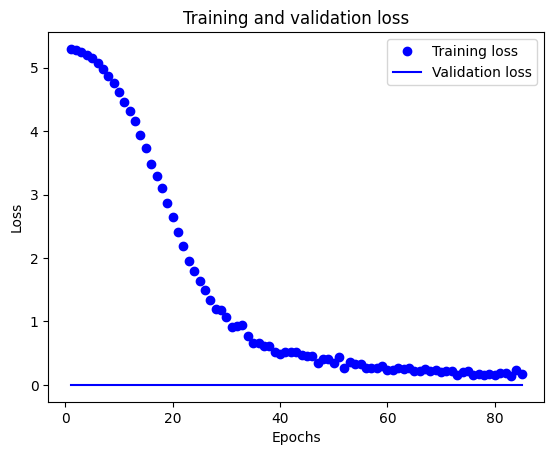

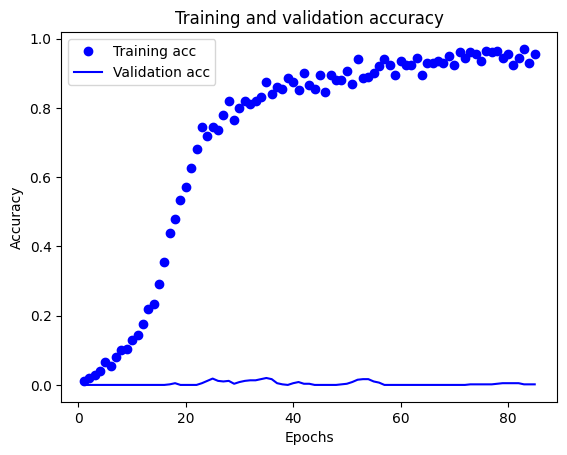

In [45]:
import matplotlib.pyplot as plt

# Plot the training and validation loss and accuracy curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss curves
plt.figure()
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy curves
plt.figure()
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**1.2.7 What do you observe in terms of performance of the model here? Explain in your own words. (1 point)** <br>
<font color='red'>Write your observation in the `Your answer` cell.</font>

**<font color='red'>Your answer:</font>** During the training process, we can observe that the loss values decrease with each epoch. At the same time, the accuracy increases until it reaches a certain point, after which the accuracy stops improving. This can be seen as a sign of the model overfitting the training data. It can be observed that the validation accuracy and loss values are not improving with each epoch, which indicates that the model is not generalizing well to the unseen data. In summary, the model's performance seems acceptable on the training data, but it is not generalizing well to the validation data, and it might be overfitting to the training data.

**1.2.8 Use the test set to predict the trained model. (1 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [49]:
test_gen = generator.flow(test_subjects, test_targets)

In [50]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 1s 920ms/step - loss: 0.0000e+00 - acc: 0.0173

Test Set Metrics:
	loss: 0.0000
	acc: 0.0173


**1.2.9 How can we improve the accuracy here? Write your suggestions. (1 point)** <br>
<font color='red'>Write your observation in the `Your answer` cell.</font>

**<font color='red'>Your answer:</font>** The model's performance on the test set is relatively poor, with an accuracy of 0.0173. There are several ways to improve the accuracy of the model:
1. **Increase the Size**: The model can learn more patterns and generalize better to unseen data if we have more data.
2. **Adjust the Architecture**: We can add more layers, increase the number of filters, or use different activation functions to increase the model's complexity and learn more patterns.
3. **Increase the Time**: Training the model for more epochs can improve accuracy by learning more from the data.
4. **Regularization Techniques**: Regularization techniques such as dropout, L1 or L2 regularization can prevent overfitting and improve the model's generalization ability.
5. **Hyperparameter Tuning**: The model's hyperparameters, such as learning rate, batch size, optimizer, etc., can improve its performance.

# 2. Node classification with GraphSAGE (5 points)
Reference: https://stellargraph.readthedocs.io/en/stable/demos/node-classification/graphsage-node-classification.html

## Libraries

In [51]:
from stellargraph.mapper import GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE

**2.1 Use the same dataset as used in the 1.1. Define number of samples as 10, 5 for each of the layers (there are 2 layers) and set size of the batch as 50.(0.5 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [52]:
batch_size = 50
num_samples = [10, 5]
num_layers = len(num_samples)

**2.2 Use required parameters here for GraphSAGENodeGenerator.(0.5 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [55]:
generator = GraphSAGENodeGenerator(cora_no_subject, batch_size, num_samples)

In [56]:
train_gen = generator.flow(train_subjects, train_targets, shuffle=True)

**2.3 Here, try atleast three different values of hidden neurons here for both the layers. keep the number of neurons same for both the layers for each model. (1 point)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [57]:
graphsage_model1 = GraphSAGE(
    layer_sizes=[16, 16], 
    generator=generator, bias=True, dropout=0.5,
)

In [58]:
graphsage_model2 = GraphSAGE(
    layer_sizes=[32, 32], 
    generator=generator, bias=True, dropout=0.5,
)

In [59]:
graphsage_model3 = GraphSAGE(
    layer_sizes=[64, 64], 
    generator=generator, bias=True, dropout=0.5,
)

**2.4 Now, use all these three models one by one and compute the test accuracy and loss. Add as many extra cells required. (2 points)** <br>
<font color='red'>How you should answer the following questions: In the `#TODO` cell you have to write the code representing your solution.</font>

In [60]:
# For model 1
x_inp, x_out = graphsage_model1.in_out_tensors()
prediction = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [61]:
# For model 2
x_inp2, x_out2 = graphsage_model2.in_out_tensors()
prediction2 = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out2)

In [62]:
# For model 3
x_inp3, x_out3 = graphsage_model3.in_out_tensors()
prediction3 = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out3)

In [64]:
# For model 1
model = Model(inputs=x_inp, outputs=prediction)
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

In [65]:
# For model 2
model2 = Model(inputs=x_inp2, outputs=prediction2)
model2.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

In [66]:
# For model 3
model3 = Model(inputs=x_inp3, outputs=prediction3)
model3.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

In [67]:
# For model 1
test_gen = generator.flow(test_subjects, test_targets)

In [68]:
# For model 2
test_gen2 = generator.flow(test_subjects, test_targets)

In [69]:
# For model 3
test_gen3 = generator.flow(test_subjects, test_targets)

In [70]:
# For model 1
history = model.fit(
    train_gen,
    epochs=50,
    validation_data=test_gen,
    verbose=2,
    shuffle=False,
)

Epoch 1/50
4/4 - 11s - loss: 5.3208 - acc: 0.0050 - val_loss: 0.0000e+00 - val_acc: 0.0021 - 11s/epoch - 3s/step
Epoch 2/50
4/4 - 3s - loss: 5.2345 - acc: 0.0250 - val_loss: 0.0000e+00 - val_acc: 0.0220 - 3s/epoch - 797ms/step
Epoch 3/50
4/4 - 2s - loss: 5.1866 - acc: 0.0300 - val_loss: 0.0000e+00 - val_acc: 0.0157 - 2s/epoch - 435ms/step
Epoch 4/50
4/4 - 3s - loss: 5.1537 - acc: 0.1250 - val_loss: 0.0000e+00 - val_acc: 0.0121 - 3s/epoch - 742ms/step
Epoch 5/50
4/4 - 3s - loss: 5.1036 - acc: 0.1300 - val_loss: 0.0000e+00 - val_acc: 0.0100 - 3s/epoch - 731ms/step
Epoch 6/50
4/4 - 3s - loss: 5.0544 - acc: 0.1750 - val_loss: 0.0000e+00 - val_acc: 0.0115 - 3s/epoch - 801ms/step
Epoch 7/50
4/4 - 4s - loss: 5.0286 - acc: 0.1800 - val_loss: 0.0000e+00 - val_acc: 0.0047 - 4s/epoch - 1s/step
Epoch 8/50
4/4 - 6s - loss: 4.9823 - acc: 0.2150 - val_loss: 0.0000e+00 - val_acc: 0.0047 - 6s/epoch - 1s/step
Epoch 9/50
4/4 - 2s - loss: 4.9494 - acc: 0.2250 - val_loss: 0.0000e+00 - val_acc: 0.0021 - 2s/

In [71]:
# For model 2
history2 = model2.fit(
    train_gen,
    epochs=50,
    validation_data=test_gen2,
    verbose=2,
    shuffle=False,
)

Epoch 1/50
4/4 - 5s - loss: 5.3399 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 5s/epoch - 1s/step
Epoch 2/50
4/4 - 3s - loss: 5.2255 - acc: 0.0400 - val_loss: 0.0000e+00 - val_acc: 0.0058 - 3s/epoch - 808ms/step
Epoch 3/50
4/4 - 3s - loss: 5.1518 - acc: 0.1500 - val_loss: 0.0000e+00 - val_acc: 0.0089 - 3s/epoch - 691ms/step
Epoch 4/50
4/4 - 3s - loss: 5.0748 - acc: 0.2650 - val_loss: 0.0000e+00 - val_acc: 0.0010 - 3s/epoch - 795ms/step
Epoch 5/50
4/4 - 3s - loss: 5.0084 - acc: 0.3600 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 3s/epoch - 728ms/step
Epoch 6/50
4/4 - 3s - loss: 4.9532 - acc: 0.4400 - val_loss: 0.0000e+00 - val_acc: 0.0010 - 3s/epoch - 733ms/step
Epoch 7/50
4/4 - 3s - loss: 4.8910 - acc: 0.5300 - val_loss: 0.0000e+00 - val_acc: 0.0016 - 3s/epoch - 797ms/step
Epoch 8/50
4/4 - 3s - loss: 4.8223 - acc: 0.5750 - val_loss: 0.0000e+00 - val_acc: 5.2411e-04 - 3s/epoch - 792ms/step
Epoch 9/50
4/4 - 3s - loss: 4.7674 - acc: 0.6300 - val_loss: 0.0000e+00 - v

In [72]:
# For model 3
history3 = model3.fit(
    train_gen,
    epochs=50,
    validation_data=test_gen3,
    verbose=2,
    shuffle=False,
)

Epoch 1/50
4/4 - 5s - loss: 5.3474 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 5s/epoch - 1s/step
Epoch 2/50
4/4 - 3s - loss: 5.1826 - acc: 0.1300 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00 - 3s/epoch - 796ms/step
Epoch 3/50
4/4 - 3s - loss: 5.0665 - acc: 0.3400 - val_loss: 0.0000e+00 - val_acc: 5.2411e-04 - 3s/epoch - 658ms/step
Epoch 4/50
4/4 - 3s - loss: 4.9686 - acc: 0.5650 - val_loss: 0.0000e+00 - val_acc: 0.0010 - 3s/epoch - 730ms/step
Epoch 5/50
4/4 - 3s - loss: 4.8762 - acc: 0.6700 - val_loss: 0.0000e+00 - val_acc: 5.2411e-04 - 3s/epoch - 735ms/step
Epoch 6/50
4/4 - 3s - loss: 4.7846 - acc: 0.7550 - val_loss: 0.0000e+00 - val_acc: 0.0010 - 3s/epoch - 728ms/step
Epoch 7/50
4/4 - 3s - loss: 4.7039 - acc: 0.8500 - val_loss: 0.0000e+00 - val_acc: 5.2411e-04 - 3s/epoch - 799ms/step
Epoch 8/50
4/4 - 3s - loss: 4.6148 - acc: 0.8400 - val_loss: 0.0000e+00 - val_acc: 0.0010 - 3s/epoch - 802ms/step
Epoch 9/50
4/4 - 3s - loss: 4.5323 - acc: 0.8750 - val_loss: 0.0000

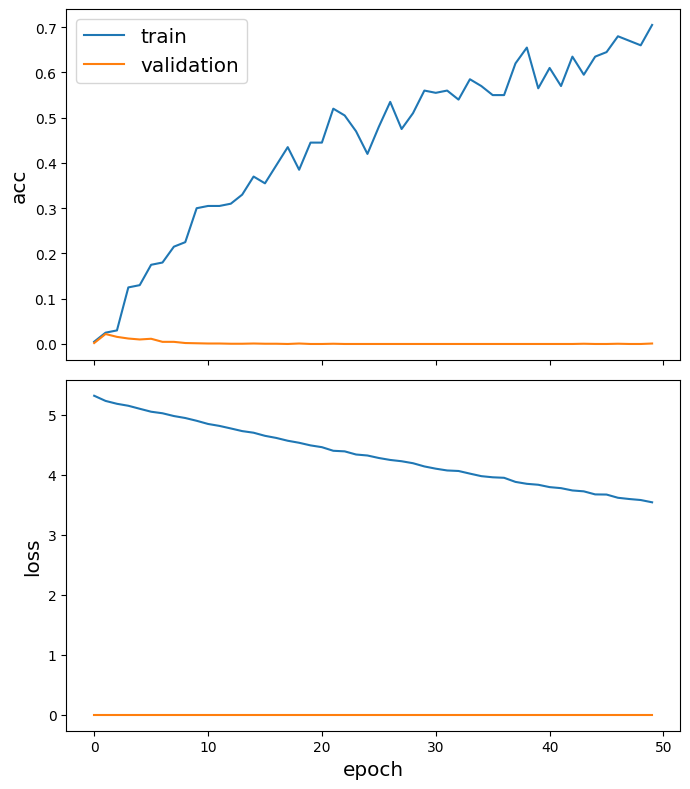

In [73]:
# For model 1
sg.utils.plot_history(history)

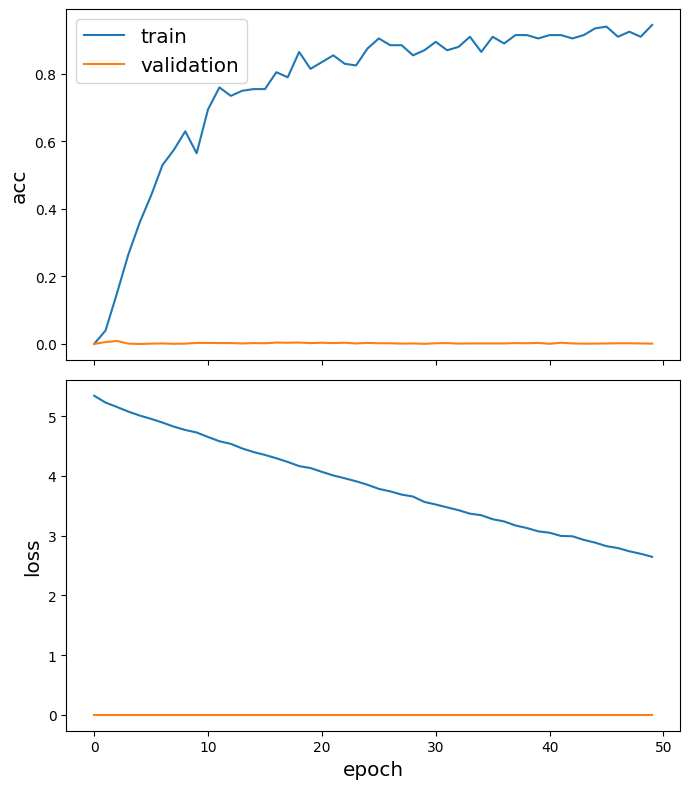

In [74]:
# For model 2
sg.utils.plot_history(history2)

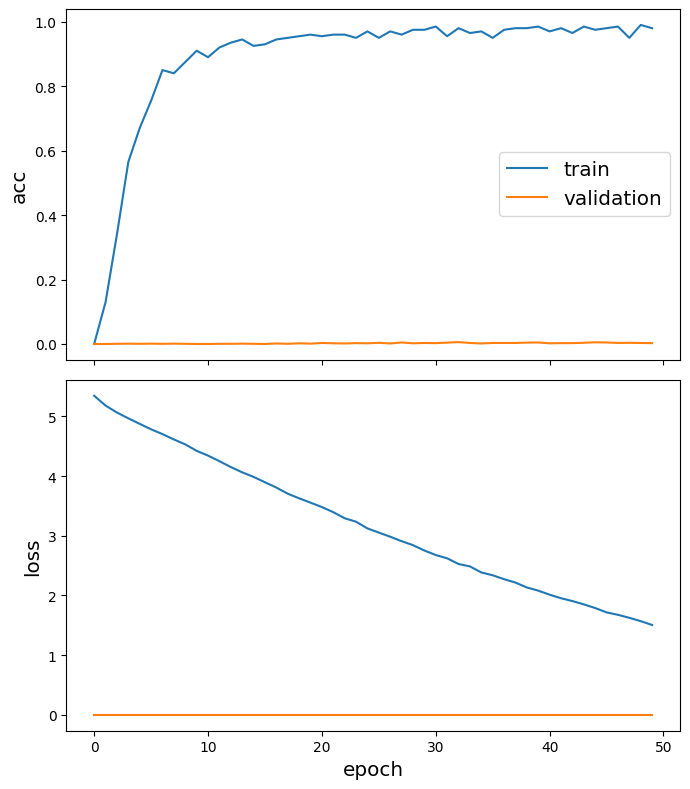

In [75]:
# For model 3
sg.utils.plot_history(history3)

In [76]:
# For model 1
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics for model 1:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

39/39 [==============================] - 4s 100ms/step - loss: 0.0000e+00 - acc: 0.0010

Test Set Metrics for model 1:
	loss: 0.0000
	acc: 0.0010


In [78]:
# For model 2
test_metrics2 = model2.evaluate(test_gen2)
print("\nTest Set Metrics for model 2:")
for name, val in zip(model2.metrics_names, test_metrics2):
    print("\t{}: {:0.4f}".format(name, val))

39/39 [==============================] - 4s 89ms/step - loss: 0.0000e+00 - acc: 0.0021

Test Set Metrics for model 2:
	loss: 0.0000
	acc: 0.0021


In [79]:
# For model 3
test_metrics3 = model3.evaluate(test_gen3)
print("\nTest Set Metrics for model 3:")
for name, val in zip(model3.metrics_names, test_metrics3):
    print("\t{}: {:0.4f}".format(name, val))

39/39 [==============================] - 2s 57ms/step - loss: 0.0000e+00 - acc: 0.0047

Test Set Metrics for model 3:
	loss: 0.0000
	acc: 0.0047


**2.5 What are your observations on three different models you built and evaluated those three models on the test set. How the performance is affected? (1 point)** <br>
<font color='red'>Write your observation in the `Your answer` cell.</font>

**<font color='red'>Your answer:</font>** All three models have very low accuracy on the test set, indicating that they are not very effective at classifying the nodes in the graph. The models may not be complex enough to capture the patterns in the data, or the parameters not have been tuned effectively.

Interestingly, the accuracy increases slightly as the number of hidden neurons in the layers increases, but the difference is minimal. Increasing the complexity of the model may not be the best approach for improving performance.

More experimentation and tuning are needed to develop a more effective model.

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks. Please change X into your estimate.

<font color='red'> **Answer:**</font> 7 hours 

## What is the level of difficulty for this homework?
Please put a number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font> 7

## Do you have any suggestions on how to improve the homework?

<font color='red'> **Answer:**</font> N/A :'(